Run the cell with a code, wait ~5 sec and provide an input. To see the list of the available countries check cell 3

Type the name of the country for which you want to see the cumulative graph of COVID - 19 cases.
	
 
	> If you are interested in more than one country, separate names by a comma followed by a space.
	> In case you want to see the graph which shows the cumulative sum for top-N countries, type N.
	> In case you want to see the graphs for all countries type 'all'.
	> In case you want to see the graph which shows the cumulative sum of total cases, type 'total'.
	

 Type here: 
 
 Ukraine, France, Romania


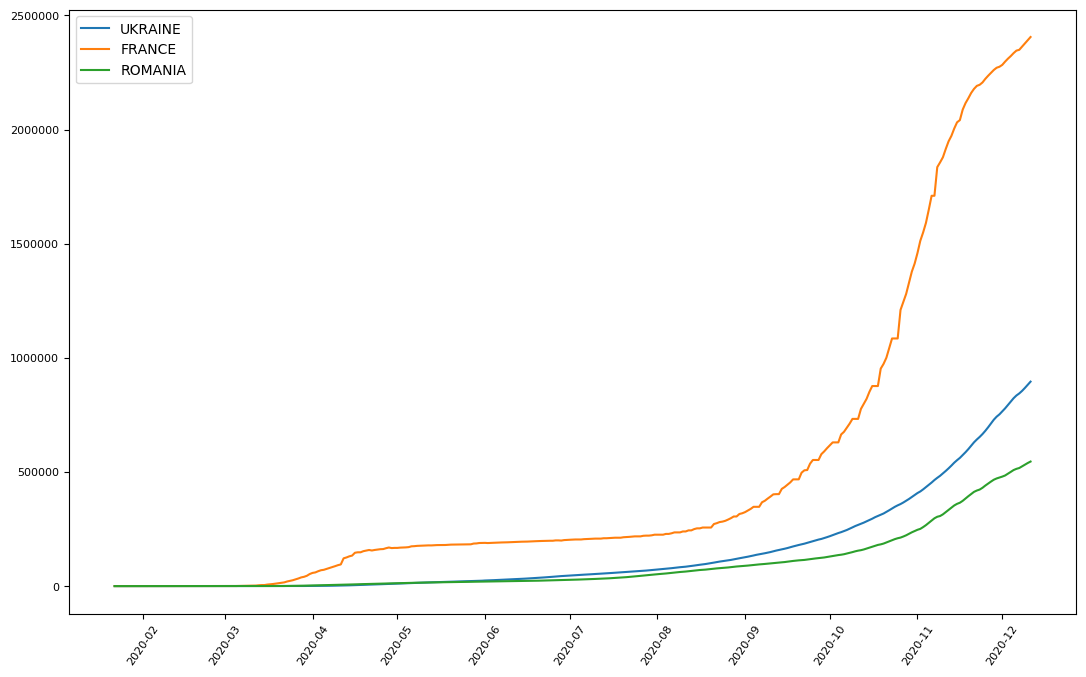

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
from urllib.request import urlretrieve
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Read the csv from the url
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/\
csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_\
confirmed_global.csv"
df = pd.read_csv(url)

# drop unneeded columns
dfl = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
# groupby by country (sum of cases(
dfg = dfl.groupby('Country/Region').sum()
# transpone for more convenient manipulations with data
dft = dfg.T.copy()
# reset index
dft = dft.copy().reset_index()
dft.columns = map(str.lower, dft.columns)

# define a variable to be able to \
# tell the user what countries are present in the dataset
countriesn = dft.columns.values
countriesstr = ""
for a in countriesn:
	if a != "index":
		countriesstr += ("\n" + a)

# define global input_number variable in order to use it later
input_number = 0

#The us_input function asks the user for the input and returns
# either the number entered by the user or the tuple with couuntry name/s
def us_input():
	userinput = input\
("""Type the name of the country for which you want to see the cumulative graph of COVID - 19 cases.
	\n 
	> If you are interested in more than one country, separate names by a semicilon followed by a space.
	> In case you want to see the graph which shows the cumulative sum for top-N countries, type N.
	> In case you want to see the graphs for all countries type 'all'.
	> In case you want to see the graph which shows the cumulative sum of total cases, type 'total'.
	\n""" + """\n Type here: \n \n """)

# If user wants to see info for top - N countries, return the input number
	if userinput.isdigit():
		global input_number
		input_number += int(userinput)
		return input_number
# Else split the userinput by semicolon in order to handle cases with >1 country
# And convert list to tuple (needed in order to be able to build charts later)
	else:
		# TODO: handle userinput better (accept arguments in commandline)
		userinput = userinput.split('; ')
		userinput = [i.lower() for i in userinput]
		return(userinput)

# This function will build the charts depending on userinput
def build_graph(*args):
# 	print(args)
	for arg in args:
		# check that the userinput is not a number and if true, iterate further
		if type(arg) != int:
# 			print(arg)           
			# set to lowercase
			# build the graph for all countries
			if arg[0].lower() == 'all':
				# perform manipulations with the dataset
				dft1 = dft.copy()
				# add date column, which holds info from index column in datetime format
				dft1['date'] = pd.to_datetime(dft1['index'])
				# drop the index column, which is redundant now
				dft1 = dft1.drop(['index'], axis=1)
				dft1.columns = map(str.upper, dft1.columns)
				# define new variable for better readability
				countr_all = dft1
				# define a new variable, with the date column dropped.
				# otherwise date will appear on the chart and in the legend as one of countries
				countr_all_1 = dft1.drop(['date'], axis=1)
				fig = plt.figure(figsize = (21, 13), dpi= 100)
				# build the chart
				plt.plot(countr_all.date, countr_all_1)
				plt.xticks(rotation = 55, fontsize = 7)
				plt.yticks(fontsize = 7)
				plt.title ('Cumulative sum graphs for all countries', fontsize = 20)
				plt.legend(dft1, fontsize = 9, ncol = 5, loc = "upper left")
				plt.show()
                    
			# build the cumulative chart for total cases worldwide
			elif arg[0].lower() == 'total':
				#perform a calculation (sum all cases)
				countr_tot = dft.sum(axis = 1).sort_values()
				fig = plt.figure(figsize = (13, 8), dpi= 100)
				# add date column, which holds info from index column in datetime format
				dft['date'] = pd.to_datetime(dft['index'])
				# build a chart
				plt.plot(dft.date, countr_tot, label = 'Total cases in all countries')
				plt.xticks(rotation = 55, fontsize = 7)
				plt.yticks(fontsize = 7)
				plt.title ('Total cases in all Countries', fontsize = 20)
				plt.legend(fontsize = 10)
				plt.show()
                    
			# build a chart for one country (or more countries) using the name entered by the user
			# TODO : handle casing (take into account US) --> convert all to lower directly in dataframe
			else:
				fig1 = plt.figure(figsize = (13, 8), dpi = 100)
				for arg1 in args:
					for arg in arg1:
						# arg = arg.title()
						plt.xticks(rotation = 55, fontsize = 8)
						plt.yticks(fontsize = 8)
						dft['date'] = pd.to_datetime(dft['index'])
						for_legend = dft[[arg]].columns.values
						for_legend = for_legend[0].upper()
						plt.plot(dft.date, dft[[arg]], label = for_legend)
						plt.legend(ncol = 1)
# 						plt.show()
                    
	# if userinput was int N, return the graph for top-N countries
	for arg in args:
		if arg == input_number:
			fig1 = plt.figure(figsize = (13, 8), dpi = 100)
			fig1.autofmt_xdate()
			ax = fig1.add_subplot(111)
			# make xticks better (not clogged)
			fig1.autofmt_xdate()
			ax.xaxis.set_major_locator(ticker.MaxNLocator())
			ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

			arg = int(arg)
			columns = df.columns[4:]
			dft2 = dfg.pivot_table(index='Country/Region', aggfunc = 'sum', fill_value = 0)
			dft2 = dft2.reindex(columns, axis = 1)
			countries_sum = dft2
			coln = ''
			# find the last date in dataset
			for col in countries_sum.columns[-1]:
				coln += col
			last_date = coln
			# find top countries for the last date
			top_x = countries_sum[last_date].nlargest(arg).index
			#print(top_x)
			# check what data is there if needed
			# top_x_d = countries_sum.loc[top_x]

			#draw a chart
			ax.plot(countries_sum.loc[top_x].T)
			plt.title ('Cumulative cases in top ' + str(arg) + ' Countries', fontsize = 20)
			plt.xticks(rotation = 55, fontsize = 8)
			plt.legend(countries_sum.loc[top_x].T, fontsize = 8, ncol = 3, loc = "upper left")
			plt.show()
            
# execute the code
build_graph(us_input())

Type the name of the country for which you want to see the cumulative graph of COVID - 19 cases.
	
 
	> If you are interested in more than one country, separate names by a comma followed by a space.
	> In case you want to see the graph which shows the cumulative sum for top-N countries, type N.
	> In case you want to see the graphs for all countries type 'all'.
	> In case you want to see the graph which shows the cumulative sum of total cases, type 'total'.
	

 Type here: 
 
 11


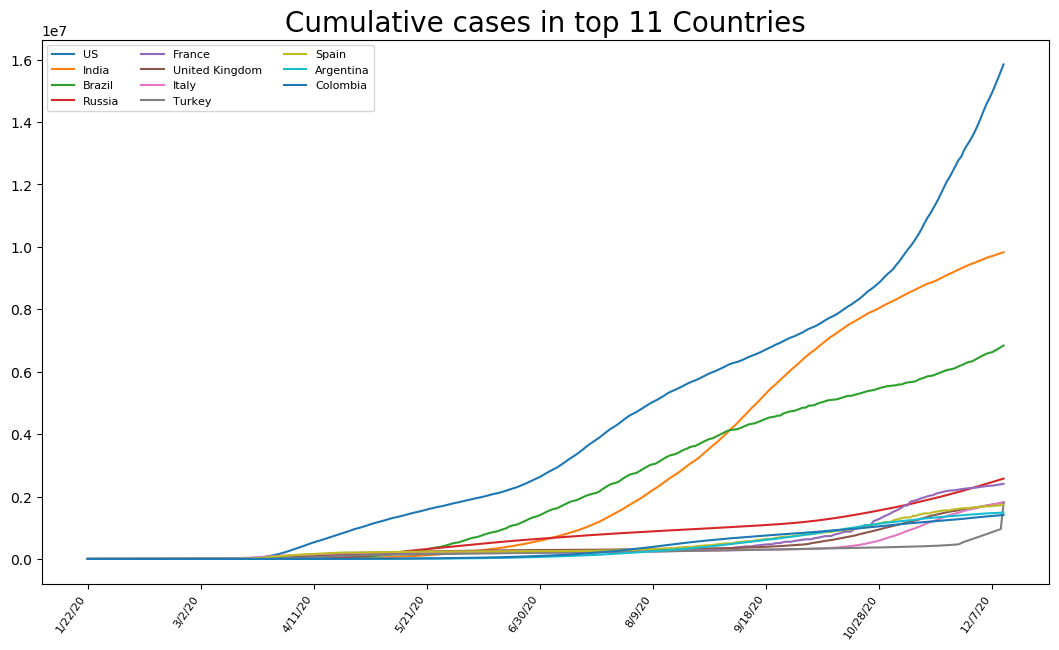

In [2]:
build_graph(us_input())

Type the name of the country for which you want to see the cumulative graph of COVID - 19 cases.
	
 
	> If you are interested in more than one country, separate names by a comma followed by a space.
	> In case you want to see the graph which shows the cumulative sum for top-N countries, type N.
	> In case you want to see the graphs for all countries type 'all'.
	> In case you want to see the graph which shows the cumulative sum of total cases, type 'total'.
	

 Type here: 
 
 total


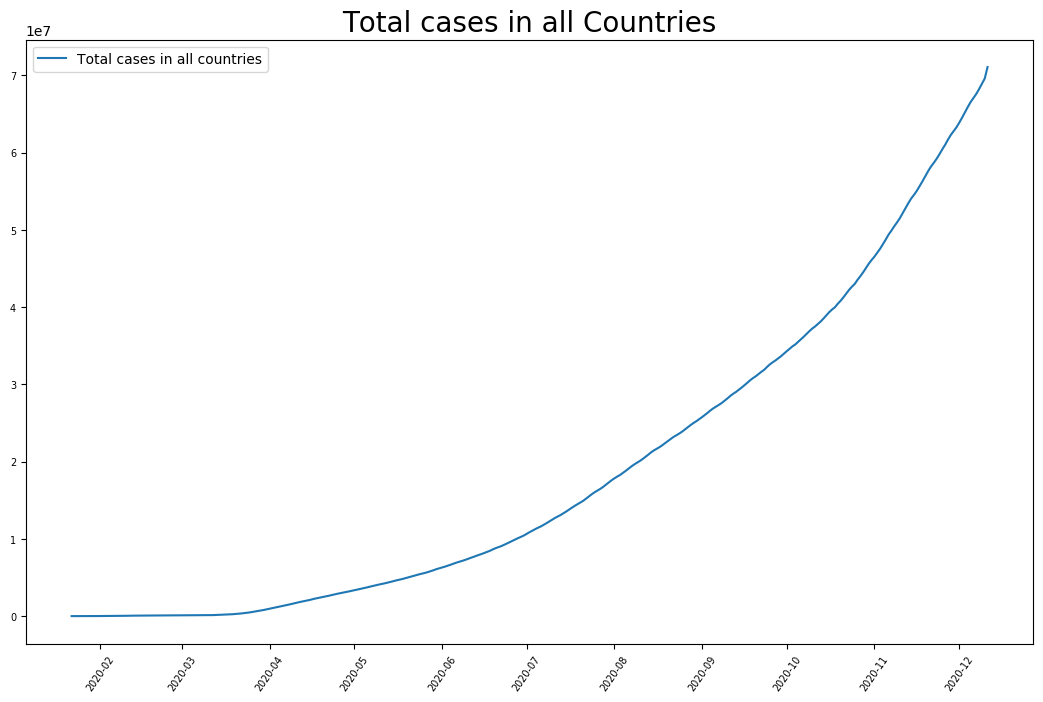

In [3]:
build_graph(us_input())

#### FYI: The countries present in the dataset are the following:

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
MS Zaandam
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Marshall Islands
Mauritania
Mauritius
Mexico
Moldova
Monaco
Mongolia
Montenegro
Morocco
Mozambique
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Nigeria
North Macedonia
Norway
Oman
Pakistan
Panama
Papua New Guinea
Paraguay
Peru
Philippines
Poland
Portugal
Qatar
Romania
Russia
Rwanda
Saint Kitts and Nevis
Saint Lucia
Saint Vincent and the Grenadines
Samoa
San Marino
Sao Tome and Principe
Saudi Arabia
Senegal
Serbia
Seychelles
Sierra Leone
Singapore
Slovakia
Slovenia
Solomon Islands
Somalia
South Africa
South Sudan
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Syria
Taiwan*
Tajikistan
Tanzania
Thailand
Timor-Leste
Togo
Trinidad and Tobago
Tunisia
Turkey
US
Uganda
Ukraine
United Arab Emirates
United Kingdom
Uruguay
Uzbekistan
Vanuatu
Venezuela
Vietnam
West Bank and Gaza
Yemen
Zambia
Zimbabwe